In [1]:
import pandas as pd
import math
import statistics

data = pd.read_csv("data.rated-only.csv")

data.head()

,toknum,tweet,clean,stance,intensity,valence_raw,valence_posnegneu,valence_emonot,valence_emointens,include,...,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date
0,1698,"Honore de Balzac: ""First love is a kind of vac...",honore de balzac first love be a kind of vacci...,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '17097525', 'username': 'quotesda...",NaN
1,2073,Next phase of Gardasil vaccination begins: The...,next phase of gardasil vaccination begin the m...,0.0,NaN,0.0,0.0,0.0,0.0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '19480980', 'username': 'radiocha...",NaN
2,2080,RT @CDCemergency: Who should be vaccinated aga...,rt who should be vaccinate against anthrax adv...,0.0,NaN,0.0,0.0,0.0,0.0,1,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '15860016', 'username': '2healthg...",NaN
3,3080,My mother just had her regular doctor's appoin...,my mother just have her regular doctor be appo...,1.0,1.0,1.0,1.0,1.0,1.0,1,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '15420720', 'username': 'GayleHow...",NaN
4,3187,@megnut dirty bath water is like a vaccination,dirty bath water be like a vaccination,-1.0,-1.0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '2984', 'username': 'go'}, {'user...",NaN


In [2]:
def count_valid_items(list, invalidNum):
    count = 0
    for item in list:
        if not (item == invalidNum):
            count = count + 1
    
    return count

In [3]:
stance = data['stance']
#print(stance)

In [4]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline




In [5]:
#let's put some columns in for potential features

#this column counts how many characters in each entry
data['body_len_char'] = data['clean'].apply(lambda x: len(x) - x.count(" "))

#checks if links present in original tweet
data['contains_link'] = [1 if ("http" in phrase) else 0 for phrase in data['tweet'] ]

#print(data['contains_link'])
#print(data['stance'])


In [6]:
#here, we can interrogate the data for tweets containing links

#here's the number of tweets labeled pro containing links
data['link_pro'] = [1 if ((data['stance'][i] == 1.0) and (data['contains_link'][i] == 1.0)) else 0 for i in range(len(data['stance']))]
link_pro = sum(data['link_pro'])
print("Number of pro tweets containing links: {}".format(link_pro))

#here's the number of tweets labeled ambiguous containing links
data['link_amb'] = [1 if ((data['stance'][i] == 0.0) and (data['contains_link'][i] == 1.0)) else 0 for i in range(len(data['stance']))]
link_amb = sum(data['link_amb'])
print("Number of ambiguous tweets containing links: {}".format(link_amb))

#here's the number of tweets labeled anti containing links
data['link_anti'] = [1 if ((data['stance'][i] == -1.0) and (data['contains_link'][i] == 1.0)) else 0 for i in range(len(data['stance']))]
link_anti = sum(data['link_anti'])
print("number of anti tweets containing links: {}".format(link_anti))


Number of pro tweets containing links: 464
Number of ambiguous tweets containing links: 637
number of anti tweets containing links: 137


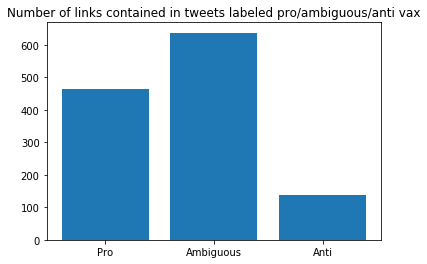

In [7]:
#plotting each of the above

from matplotlib.ticker import FuncFormatter
import numpy as np

x = np.arange(3)
y = [link_pro, link_amb, link_anti]

def values(x, pos):
    return '%1.1d' % (x)

formatter = FuncFormatter(values)
fig, ax = pyplot.subplots()
ax.yaxis.set_major_formatter(formatter)
pyplot.bar(x, y)
pyplot.xticks(x, ('Pro', 'Ambiguous', 'Anti'))
pyplot.title("Number of links contained in tweets labeled pro/ambiguous/anti vax")

pyplot.show()


In [8]:
#let's interrogate the tweet length feature

#here's the length of tweets labeled pro
data['c_len_pro'] = [data['body_len_char'][i] if (data['stance'][i] == 1.0) else 0 for i in range(len(data['body_len_char']))]
c_len_pro_sum = sum(data['c_len_pro'])
num_elems_pro = sum([1 if (value > 0) else 0 for value in data['c_len_pro']])
c_len_pro_avg = int(c_len_pro_sum/num_elems_pro)
print("Average length of pro tweet: {}".format(c_len_pro_avg))

#here's the length of tweets labeled ambiguous
data['c_len_amb'] = [data['body_len_char'][i] if (data['stance'][i] == 0.0) else 0 for i in range(len(data['body_len_char']))]
c_len_amb_sum = sum(data['c_len_amb'])
num_elems_amb = sum([1 if (value > 0) else 0 for value in data['c_len_amb']])
c_len_amb_avg = int(c_len_amb_sum/num_elems_amb)
print("Average length of ambiguous tweet: {}".format(c_len_amb_avg))

#here's the length of tweets labeled anti
data['c_len_anti'] = [data['body_len_char'][i] if (data['stance'][i] == -1.0) else 0 for i in range(len(data['body_len_char']))]
c_len_anti_sum = sum(data['c_len_anti'])
num_elems_anti = sum([1 if (value > 0) else 0 for value in data['c_len_anti']])
c_len_anti_avg = int(c_len_anti_sum/num_elems_anti)
print("Average length of anti tweet: {}".format(c_len_anti_avg))

#here's the avg length of all tweets
data['c_len_total'] = [data['body_len_char'][i] for i in range(len(data['body_len_char']))]
c_len_total_sum = sum(data['c_len_total'])
num_elems_total = sum([1 if (value > 0) else 0 for value in data['c_len_total']])
c_len_total_avg = int(c_len_total_sum/num_elems_total)
print('Average length of all tweets: {}'.format(c_len_total_avg))

Average length of pro tweet: 99
Average length of ambiguous tweet: 72
Average length of anti tweet: 91
Average length of all tweets: 85


Can't see any trends


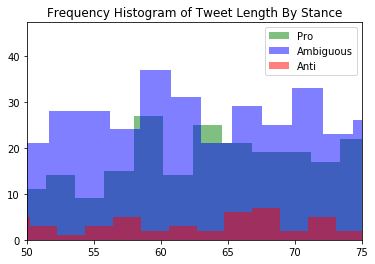

In [19]:
avg_pro = data.loc[data.stance == 1.0, 'c_len_total']
avg_amb = data.loc[data.stance == 0.0, 'c_len_total']
avg_anti = data.loc[data.stance == -1.0, 'c_len_total']
avg_total = data['c_len_total']

kwargs = dict(alpha=0.5, bins=100)

pyplot.hist(avg_pro, **kwargs, color='g', label='Pro')
pyplot.hist(avg_amb, **kwargs, color='b', label='Ambiguous')
pyplot.hist(avg_anti, **kwargs, color='r', label='Anti')
# pyplot.hist(avg_total, **kwargs, color='orange', label='All')


pyplot.gca().set(title='Frequency Histogram of Tweet Length By Stance')
pyplot.xlim(50,75)
pyplot.legend()

print("Can't see any trends")

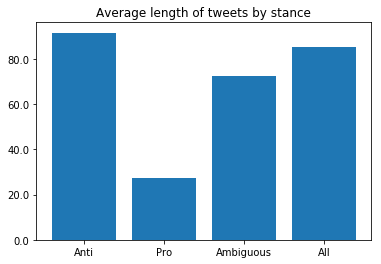

Average intensity of Pro tweets: 27.307585729130587
Average intensity of Anti tweets: 91.71681415929204
Average intensity of All tweets: 85.21712744436952
Average intensity of All tweets: 72.65993623804464 

Standard Deviation = 44.08521054635361
Pro tweets are -1.3135820606856277 standard deviations away from the mean
Anti tweets are 0.14743463021659817 standard deviations away from the mean 

This might be a good feature to differentiate pro features


In [26]:
#let's compare the tweet lengths

len_pro = data.loc[data.stance == 1.0, 'c_len_total']
len_amb = data.loc[data.stance == 0.0, 'c_len_total']
len_anti = data.loc[data.stance == -1.0, 'c_len_total']


avg_len_anti = np.nansum(len_anti)/count_valid_items(len_anti, 'nan')
avg_len_pro = np.nansum(len_pro)/count_valid_items(abs_int_pro, 'nan')
avg_len_ambi = np.nansum(len_amb)/count_valid_items(len_amb, 'nan')
avg_len_total = np.nansum(data['c_len_total'])/count_valid_items(data['c_len_total'], 'nan')

x = np.arange(4)
y1 = [avg_len_anti, avg_len_pro, avg_len_ambi, avg_len_total]

def values(x, pos):
    return '%1.1f' % (x)

formatter = FuncFormatter(values)
fig, ax = pyplot.subplots()
ax.yaxis.set_major_formatter(formatter)

pyplot.bar(x, y1)

pyplot.xticks(x, ('Anti', 'Pro', 'Ambiguous', 'All'))
pyplot.title("Average length of tweets by stance")

pyplot.show()

stdev = statistics.pstdev(data['c_len_total'])

print("Average intensity of Pro tweets: {}".format(avg_len_pro))
print("Average intensity of Anti tweets: {}".format(avg_len_anti))
print("Average intensity of All tweets: {}".format(avg_len_total))
print("Average intensity of All tweets: {} \n".format(avg_len_ambi))

print("Standard Deviation = {}".format(stdev))
print("Pro tweets are {} standard deviations away from the mean".format((avg_len_pro - avg_len_total)/stdev))
print("Anti tweets are {} standard deviations away from the mean \n".format(abs(avg_len_anti - avg_len_total)/stdev))

print("This might be a good feature to differentiate pro features")

In [13]:
#let's explore the intensity feature


C:\Users\ayala\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ayala\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


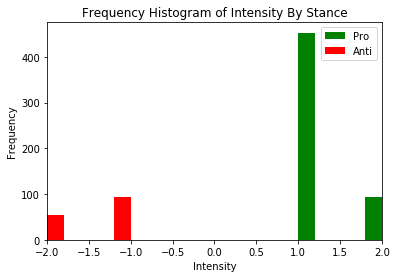

In [14]:
#plotting intensity

inte_pro = data.loc[data['stance'] == 1.0, 'intensity']
inte_amb = data.loc[data['stance'] == 0.0, 'intensity']
inte_anti = data.loc[data['stance'] == -1.0, 'intensity']

inte_total = data['intensity']

kwargs = dict(alpha=1, bins=5)

pyplot.hist(inte_pro, **kwargs, color='g', label='Pro')
# pyplot.hist(inte_amb, **kwargs, color='b', label='Ambiguous')
pyplot.hist(inte_anti, **kwargs, color='r', label='Anti')



pyplot.gca().set(title='Frequency Histogram of Intensity By Stance', ylabel='Frequency', xlabel='Intensity')
pyplot.xlim(-2, 2)
pyplot.legend()

# print("Can't see any trends")

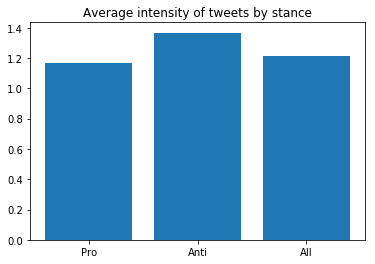

Average intensity of Pro tweets: 1.3673469387755102
Average intensity of Anti tweets: 1.1703296703296704
Average intensity of All tweets: 1.2115107913669065
Standard Deviation = 0.4083796964863109
Pro tweets are 0.3815962173178885 standard deviations away from the mean
Anti tweets are 0.10084027534071238 standard deviations away from the mean
No significance


In [15]:
#let's compare the average intensity (the absolute value)


abs_int_anti = [abs(data['intensity'][i]) if (data['stance'][i] == 1.0) else 0 for i in range(len(data['intensity']))]
abs_int_pro = [abs(data['intensity'][i]) if data['stance'][i] == -1.0 else 0 for i in range(len(data['intensity']))]
abs_int_total = [abs(data['intensity'][i])  for i in range(len(data['intensity']))]

abs_int_anti = [x for x in abs_int_anti if str(x) != 'nan']
abs_int_pro = [x for x in abs_int_pro if str(x) != 'nan']
abs_int_total = [x for x in abs_int_total if str(x) != 'nan']


# print(abs_int_total)


# print(count_valid_items(abs_int_anti, 0.0))
# print(count_valid_items(abs_int_pro, 0.0))
# print(count_valid_items(abs_int_total, 0.0))

avg_int_anti = np.nansum(abs_int_anti)/count_valid_items(abs_int_anti, 0.0)
avg_int_pro = np.nansum(abs_int_pro)/count_valid_items(abs_int_pro, 0.0)
avg_int_total = np.nansum(abs_int_total)/count_valid_items(abs_int_total, 0.0)

x = np.arange(3)
y1 = [avg_int_anti, avg_int_pro, avg_int_total]

def values(x, pos):
    return '%1.1f' % (x)

formatter = FuncFormatter(values)
fig, ax = pyplot.subplots()
ax.yaxis.set_major_formatter(formatter)

pyplot.bar(x, y1)

pyplot.xticks(x, ('Pro', 'Anti', 'All'))
pyplot.title("Average intensity of tweets by stance")

pyplot.show()

stdev = statistics.pstdev(abs_int_total)

print("Average intensity of Pro tweets: {}".format(avg_int_pro))
print("Average intensity of Anti tweets: {}".format(avg_int_anti))
print("Average intensity of All tweets: {}".format(avg_int_total))

print("Standard Deviation = {}".format(stdev))
print("Pro tweets are {} standard deviations away from the mean".format((avg_int_pro - avg_int_total)/stdev))
print("Anti tweets are {} standard deviations away from the mean".format(abs(avg_int_anti - avg_int_total)/stdev))

print("No significance")



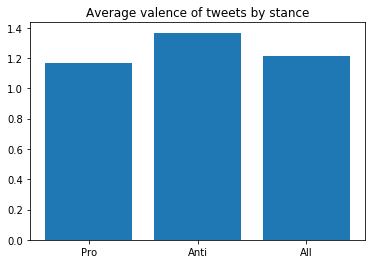

Average valence of Pro tweets: 1.3673469387755102
Average valence of Anti tweets: 1.1703296703296704
Average valence of All tweets: 1.2115107913669065
Standard Deviation = 0.4083796964863109
Pro tweets are 0.3815962173178885 standard deviations away from the mean
Anti tweets are 0.10084027534071238 standard deviations away from the mean
Not Significant


In [16]:
#now let's look at intensity

abs_val_anti = [abs(data['valence_raw'][i]) if (data['stance'][i] == 1.0) else 0 for i in range(len(data['valence_raw']))]
abs_val_pro = [abs(data['valence_raw'][i]) if data['stance'][i] == -1.0 else 0 for i in range(len(data['valence_raw']))]
abs_val_total = [abs(data['valence_raw'][i])  for i in range(len(data['intensity']))]


#clean the list by removing NaN's
abs_val_anti = [x for x in abs_int_anti if str(x) != 'nan']
abs_val_pro = [x for x in abs_int_pro if str(x) != 'nan']
abs_val_total = [x for x in abs_int_total if str(x) != 'nan']

avg_val_anti = sum(abs_int_anti)/count_valid_items(abs_int_anti, 0.0)
avg_val_pro = sum(abs_int_pro)/count_valid_items(abs_int_pro, 0.0)
avg_val_total = sum(abs_int_total)/count_valid_items(abs_int_total, 0.0)

x = np.arange(3)
y1 = [avg_val_anti, avg_val_pro, avg_val_total]

def values(x, pos):
    return '%1.1f' % (x)

formatter = FuncFormatter(values)
fig, ax = pyplot.subplots()
ax.yaxis.set_major_formatter(formatter)

pyplot.bar(x, y1)

pyplot.xticks(x, ('Pro', 'Anti', 'All'))
pyplot.title("Average valence of tweets by stance")

pyplot.show()

stdev = statistics.pstdev(abs_val_total)

print("Average valence of Pro tweets: {}".format(avg_val_pro))
print("Average valence of Anti tweets: {}".format(avg_val_anti))
print("Average valence of All tweets: {}".format(avg_val_total))

print("Standard Deviation = {}".format(stdev))
print("Pro tweets are {} standard deviations away from the mean".format((avg_val_pro - avg_val_total)/stdev))
print("Anti tweets are {} standard deviations away from the mean".format(abs(avg_val_anti - avg_val_total)/stdev))

print("Not Significant")


In [17]:
#exploring valence